<a href="https://colab.research.google.com/github/akfangus/DeepProject/blob/main/natural_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import os
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms,models,datasets
import matplotlib.pyplot as plt
from PIL import Image
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2
from glob import glob
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

from tqdm import tqdm

In [3]:
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

In [5]:
path = []

for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/natural_image_classification/natural_images'):
  print(i)
  for item in glob(f'/content/drive/MyDrive/Colab Notebooks/natural_image_classification/natural_images/{i}/*'):
    path.append(item)

len(path)

person
dog
flower
airplane
car
fruit
cat
motorbike


6899

In [6]:
#{} 딕셔너리, 형태로 해당 경로에 있는 디렉토리를 sorting한다음에 인덱스순서대로 딕셔너리화
cmap = {v:i for i,v in enumerate(sorted(os.listdir('/content/drive/MyDrive/Colab Notebooks/natural_image_classification/natural_images')))}
cmap

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

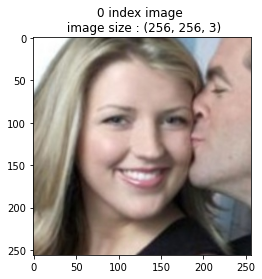

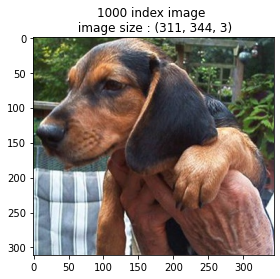

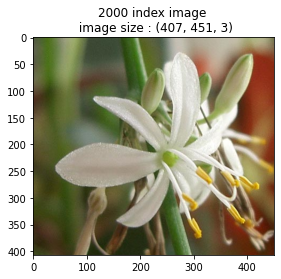

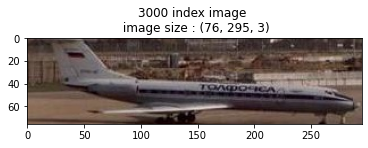

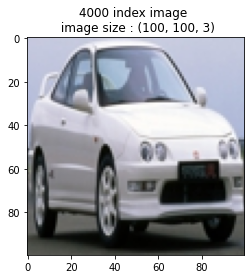

In [12]:
for i in range(5):
  plt.figure()
  imim = cv2.imread(path[i*1000])[:,:,::-1]
  plt.imshow(imim)
  plt.title(f"{i*1000} index image \n image size : {imim.shape}")

plt.show()

-이미지마다 사이즈가 다르네? => 이미지 사이즈를 통일 시켜야할 필요